# ACO – TSP | 20 ISAN Provinces
**Ant Colony Optimization** applied to the Travelling Salesman Problem for all 20 provinces in the ISAN region of Thailand.

## 1. Imports

In [2]:
import math
import random
import time as tm
import matplotlib.pyplot as plt

## 2. ISAN Province Data (lat, lon)

In [4]:
ISAN_PROVINCES = [
    ("กาฬสินธุ์",       "Kalasin",            16.4314078, 103.5058755),
    ("ขอนแก่น",         "Khon Kaen",          16.4419355, 102.8359921),
    ("ชัยภูมิ",         "Chaiyaphum",         15.8068173, 102.0315027),
    ("นครพนม",          "Nakhon Phanom",      17.3920390, 104.7695508),
    ("นครราชสีมา",      "Nakhon Ratchasima",  14.9798997, 102.0977693),
    ("บุรีรัมย์",       "Buriram",            14.9930017, 103.1029191),
    ("มหาสารคาม",       "Maha Sarakham",      16.1850896, 103.3026461),
    ("มุกดาหาร",        "Mukdahan",           16.5424430, 104.7209151),
    ("ยโสธร",           "Yasothon",           15.7926410, 104.1452827),
    ("ร้อยเอ็ด",        "Roi Et",             16.0538196, 103.6520036),
    ("เลย",             "Loei",               17.4860232, 101.7223002),
    ("ศรีสะเกษ",        "Sisaket",            15.1186009, 104.3220095),
    ("สกลนคร",          "Sakon Nakhon",       17.1545995, 104.1348365),
    ("สุรินทร์",        "Surin",              14.8829050, 103.4937107),
    ("หนองคาย",         "Nong Khai",          17.8782803, 102.7412638),
    ("หนองบัวลำภู",     "Nong Bua Lamphu",    17.2218247, 102.4260368),
    ("อำนาจเจริญ",      "Amnat Charoen",      15.8656783, 104.6257774),
    ("อุดรธานี",        "Udon Thani",         17.4138413, 102.7872325),
    ("อุบลราชธานี",     "Ubon Ratchathani",   15.2286861, 104.8564217),
    ("บึงกาฬ",          "Bueng Kan",          18.3609104, 103.6464463),
]

names    = [p[0] for p in ISAN_PROVINCES]   # Thai names
names_en = [p[1] for p in ISAN_PROVINCES]   # English names
nodes    = [(p[2], p[3]) for p in ISAN_PROVINCES]  # (lat, lon)

print(f'Loaded {len(nodes)} ISAN provinces')
for i, p in enumerate(ISAN_PROVINCES):
    print(f'  {i+1:2d}. {p[0]} ({p[1]})  lat={p[2]}, lon={p[3]}')

Loaded 20 ISAN provinces
   1. กาฬสินธุ์ (Kalasin)  lat=16.4314078, lon=103.5058755
   2. ขอนแก่น (Khon Kaen)  lat=16.4419355, lon=102.8359921
   3. ชัยภูมิ (Chaiyaphum)  lat=15.8068173, lon=102.0315027
   4. นครพนม (Nakhon Phanom)  lat=17.392039, lon=104.7695508
   5. นครราชสีมา (Nakhon Ratchasima)  lat=14.9798997, lon=102.0977693
   6. บุรีรัมย์ (Buriram)  lat=14.9930017, lon=103.1029191
   7. มหาสารคาม (Maha Sarakham)  lat=16.1850896, lon=103.3026461
   8. มุกดาหาร (Mukdahan)  lat=16.542443, lon=104.7209151
   9. ยโสธร (Yasothon)  lat=15.792641, lon=104.1452827
  10. ร้อยเอ็ด (Roi Et)  lat=16.0538196, lon=103.6520036
  11. เลย (Loei)  lat=17.4860232, lon=101.7223002
  12. ศรีสะเกษ (Sisaket)  lat=15.1186009, lon=104.3220095
  13. สกลนคร (Sakon Nakhon)  lat=17.1545995, lon=104.1348365
  14. สุรินทร์ (Surin)  lat=14.882905, lon=103.4937107
  15. หนองคาย (Nong Khai)  lat=17.8782803, lon=102.7412638
  16. หนองบัวลำภู (Nong Bua Lamphu)  lat=17.2218247, lon=102.4260368
  17. อำนาจเจริญ (Am

## 3. Haversine Distance (km)

In [5]:
def haversine(a, b):
    """Great-circle distance between two (lat, lon) points in km."""
    R = 6371.0
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    h = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    return R * 2 * math.asin(math.sqrt(h))

# Build distance matrix
n = len(nodes)
dist_matrix = [[0.0]*n for _ in range(n)]
for i in range(n):
    for j in range(n):
        if i != j:
            dist_matrix[i][j] = haversine(nodes[i], nodes[j])

print('Distance matrix built.')
print(f'Example: {names_en[0]} -> {names_en[1]} = {dist_matrix[0][1]:.2f} km')

Distance matrix built.
Example: Kalasin -> Khon Kaen = 71.45 km


## 4. ACO Parameters

In [6]:
# ── ACO Parameters ──────────────────────────────────
MODE        = 'ACS'   # Ant Colony System
COLONY_SIZE = 20      # Number of ants
ALPHA       = 1.0     # Pheromone importance
BETA        = 3.0     # Heuristic (distance) importance
RHO         = 0.1     # Pheromone evaporation rate
Q           = 1.0     # Pheromone deposit weight
TAU0        = 1.0     # Initial pheromone level
STEPS       = 200     # Number of iterations
# ────────────────────────────────────────────────────

print('=' * 45)
print('        ACO Parameters')
print('=' * 45)
print(f'  Mode                     : {MODE}')
print(f'  Colony size (ants)       : {COLONY_SIZE}')
print(f'  Alpha α (pheromone)      : {ALPHA}')
print(f'  Beta β  (heuristic)      : {BETA}')
print(f'  Rho ρ   (evaporation)    : {RHO}')
print(f'  Q      (deposit weight)  : {Q}')
print(f'  τ0     (initial pheromone): {TAU0}')
print(f'  Steps  (iterations)      : {STEPS}')
print(f'  Num nodes                : {n}')
print('=' * 45)

        ACO Parameters
  Mode                     : ACS
  Colony size (ants)       : 20
  Alpha α (pheromone)      : 1.0
  Beta β  (heuristic)      : 3.0
  Rho ρ   (evaporation)    : 0.1
  Q      (deposit weight)  : 1.0
  τ0     (initial pheromone): 1.0
  Steps  (iterations)      : 200
  Num nodes                : 20


## 5. ACO Algorithm

In [7]:
def select_next(current, visited, pheromone):
    """Roulette-wheel selection of next unvisited node."""
    unvisited = [j for j in range(n) if j not in visited]
    denom = sum(
        (pheromone[current][j] ** ALPHA) * ((1.0 / dist_matrix[current][j]) ** BETA)
        for j in unvisited
    )
    probs = [
        ((pheromone[current][j] ** ALPHA) * ((1.0 / dist_matrix[current][j]) ** BETA) / denom, j)
        for j in unvisited
    ]
    r, cumul = random.random(), 0.0
    for p, j in probs:
        cumul += p
        if cumul >= r:
            return j
    return probs[-1][1]


def tour_length(tour):
    return sum(dist_matrix[tour[i]][tour[(i + 1) % n]] for i in range(n))


def run_aco(seed=42):
    random.seed(seed)
    pheromone = [[TAU0] * n for _ in range(n)]
    global_best_tour = None
    global_best_dist = float('inf')

    start = tm.time()
    for step in range(STEPS):
        all_tours = []
        for _ in range(COLONY_SIZE):
            tour = [random.randint(0, n - 1)]
            while len(tour) < n:
                tour.append(select_next(tour[-1], set(tour), pheromone))
            d = tour_length(tour)
            all_tours.append((tour, d))
            if d < global_best_dist:
                global_best_dist = d
                global_best_tour = tour[:]

        # Evaporation
        for i in range(n):
            for j in range(n):
                pheromone[i][j] *= (1.0 - RHO)

        # Deposit
        for tour, d in all_tours:
            delta = Q / d
            for i in range(n):
                a, b = tour[i], tour[(i + 1) % n]
                pheromone[a][b] += delta
                pheromone[b][a] += delta

    runtime = tm.time() - start
    return global_best_tour, global_best_dist, runtime


print('ACO functions defined. Ready to run.')

ACO functions defined. Ready to run.


## 6. Run ACO & Show Results

In [8]:
best_tour, best_dist, runtime = run_aco(seed=42)

print(f'⏱️  Runtime          : {runtime:.3f} s')
print(f'📏  Shortest distance : {best_dist:.2f} km')
print()
print('🗺️  Optimal Travel Route:')
print('-' * 60)
for step_i, idx in enumerate(best_tour):
    next_idx = best_tour[(step_i + 1) % n]
    d = dist_matrix[idx][next_idx]
    print(f'  {step_i+1:2d}. {names[idx]:<18} -> {names[next_idx]:<18} ({d:.1f} km)')
print('-' * 60)
print(f'  Return to start : {names[best_tour[0]]}')
print(f'  Total distance  : {best_dist:.2f} km')

⏱️  Runtime          : 0.595 s
📏  Shortest distance : 1661.87 km

🗺️  Optimal Travel Route:
------------------------------------------------------------
   1. กาฬสินธุ์          -> มหาสารคาม          (34.9 km)
   2. มหาสารคาม          -> ร้อยเอ็ด           (40.1 km)
   3. ร้อยเอ็ด           -> ยโสธร              (60.2 km)
   4. ยโสธร              -> อำนาจเจริญ         (52.0 km)
   5. อำนาจเจริญ         -> อุบลราชธานี        (75.0 km)
   6. อุบลราชธานี        -> ศรีสะเกษ           (58.6 km)
   7. ศรีสะเกษ           -> สุรินทร์           (92.7 km)
   8. สุรินทร์           -> บุรีรัมย์          (43.7 km)
   9. บุรีรัมย์          -> นครราชสีมา         (108.0 km)
  10. นครราชสีมา         -> ชัยภูมิ            (92.2 km)
  11. ชัยภูมิ            -> ขอนแก่น            (111.2 km)
  12. ขอนแก่น            -> หนองบัวลำภู        (97.1 km)
  13. หนองบัวลำภู        -> เลย                (80.3 km)
  14. เลย                -> อุดรธานี           (113.3 km)
  15. อุดรธานี           -> หนองคาย           

## 7. Plot the Route

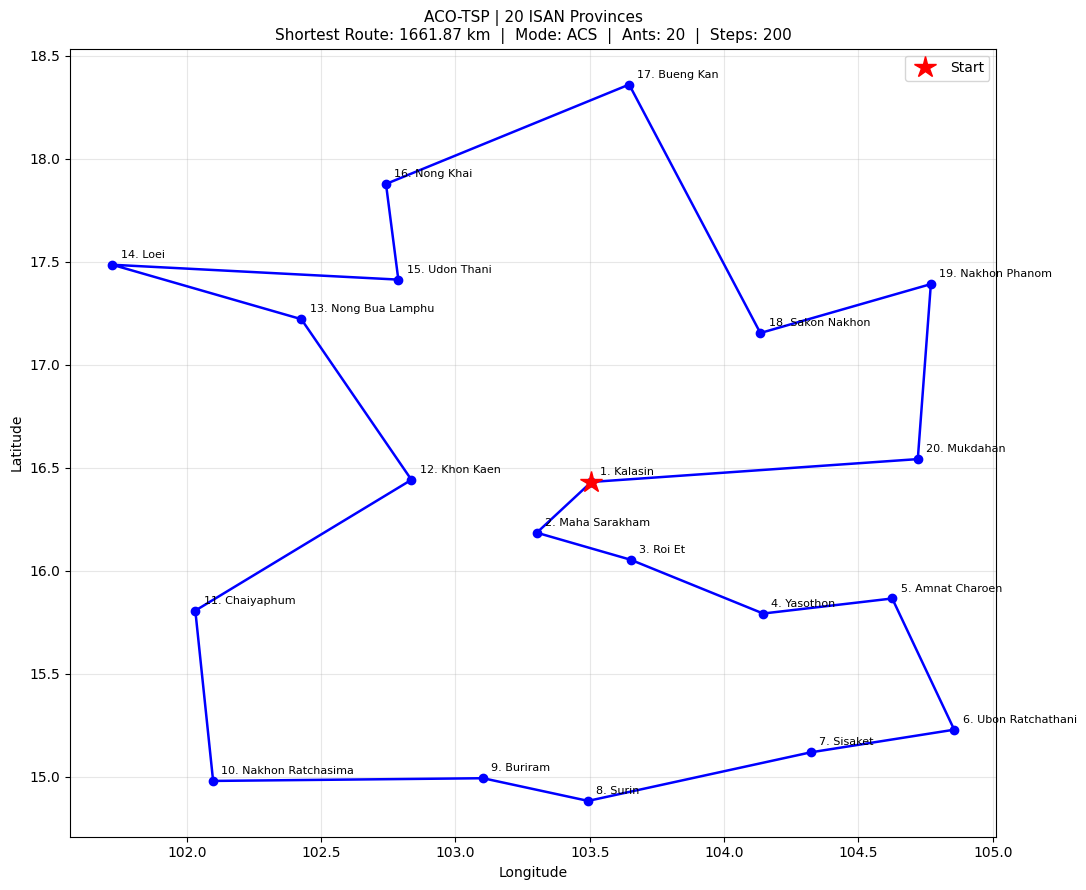

Map saved as aco_isan_route.png


In [9]:
fig, ax = plt.subplots(figsize=(11, 9))

tour_lons = [nodes[i][1] for i in best_tour] + [nodes[best_tour[0]][1]]
tour_lats = [nodes[i][0] for i in best_tour] + [nodes[best_tour[0]][0]]

ax.plot(tour_lons, tour_lats, 'b-o', linewidth=1.8, markersize=6, zorder=2)
ax.plot(tour_lons[0], tour_lats[0], 'r*', markersize=16, zorder=3, label='Start')

for i, idx in enumerate(best_tour):
    ax.annotate(
        f"{i+1}. {names_en[idx]}",
        (nodes[idx][1], nodes[idx][0]),
        textcoords='offset points', xytext=(6, 5),
        fontsize=8
    )

ax.set_title(
    f'ACO-TSP | 20 ISAN Provinces\n'
    f'Shortest Route: {best_dist:.2f} km  |  Mode: {MODE}  |  Ants: {COLONY_SIZE}  |  Steps: {STEPS}',
    fontsize=11
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('aco_isan_route.png', dpi=150)
plt.show()
print('Map saved as aco_isan_route.png')